In [158]:
import pandas as pd
df=pd.DataFrame()

In [160]:
df=pd.read_csv('gayanagar.csv', index_col='date',parse_dates=True)

<ipython-input-160-44502d07888f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('gayanagar.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

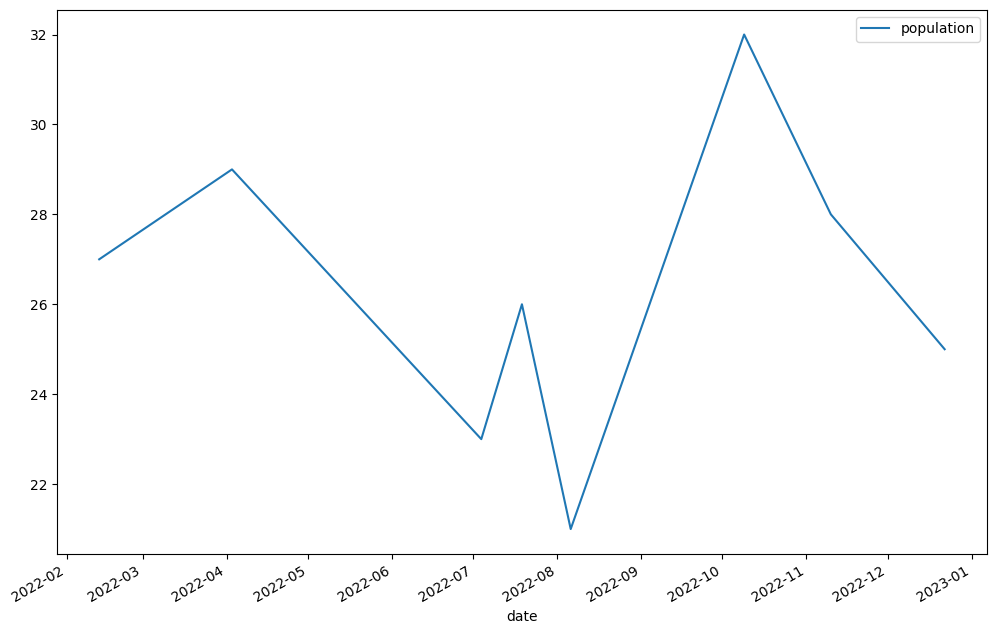

In [161]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [162]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-07-04,23.0,NaN,NaN,NaN
2022-08-06,21.0,23.0,NaN,NaN
2022-07-19,26.0,21.0,23.0,NaN
2022-10-09,32.0,26.0,21.0,23.0
2022-11-10,28.0,32.0,26.0,21.0
2022-12-22,25.0,28.0,32.0,26.0
2022-02-13,27.0,25.0,28.0,32.0
2022-04-03,29.0,27.0,25.0,28.0
NaT,NaN,29.0,27.0,25.0


In [163]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-10-09,32.0,26.0,21.0,23.0
2022-11-10,28.0,32.0,26.0,21.0
2022-12-22,25.0,28.0,32.0,26.0
2022-02-13,27.0,25.0,28.0,32.0
2022-04-03,29.0,27.0,25.0,28.0


In [164]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [165]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [166]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[26. 21. 23.]
 [32. 26. 21.]
 [28. 32. 26.]
 [25. 28. 32.]
 [27. 25. 28.]]


In [167]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(4, 3)
(4, 1)


In [168]:
lin_model.fit(X_train,y_train)

LinearRegression()

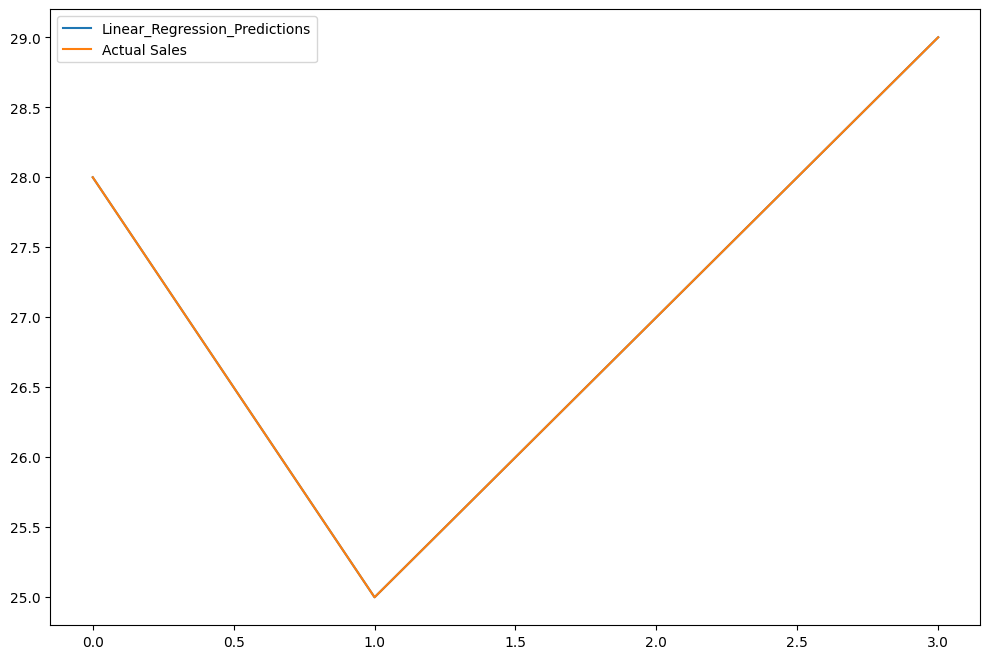

In [169]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [170]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [173]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 1.1234667099445444e-14
